In [33]:
import difflib
import json
import matplotlib
from matplotlib.colors import ListedColormap
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
import statistics
import sys
sys.path.insert(0, '..')
import warnings
import zlib

# local
from libs.interfaces.rolodex_interface import rolodex_load
from libs.viz.utils import add_vbar_labels, add_hbar_labels

In [ ]:
plt.style.use('dark_background')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
wrk_pidata_df = pd.read_csv('../data/raw_data/westrock/wrk_pi_data.csv')

In [24]:
wrk_pidata_df['Date'] = pd.to_datetime(wrk_pidata_df['Date'])

In [25]:
wrk_pidata_df.head()

,Date,Green Liquor Clarifier,Brown Liquor Storage,C Line Filtrate 1,C Line Filtrate 2
0,2022-10-17,7.997306,0.566707,12.287388,11.305936
1,2022-10-18,7.943154,1.394887,13.456722,12.147379
2,2022-10-19,8.991972,3.451199,12.547819,12.109792
3,2022-10-20,8.229540,2.864440,13.648890,11.665515
4,2022-10-21,8.231861,0.727906,14.267343,11.040789


In [82]:
def plot_fill_height(x, y, max_height, shell_course_list, title):
    """
    Plot fill height.
    """

    fig, ax = plt.subplots()
    plt.rcParams["figure.figsize"] = (16,8)
    
    plt.plot(x, y, label='Daily Avg Fill Height')
    
    plt.xticks(rotation=45)
    
    plt.axhline(y=max(y), c='r', linestyle='--', label='Max', alpha=0.75)
    plt.axhline(y=min(y), c='r', linestyle='-.', label='Min', alpha=0.75)
    plt.axhline(y=statistics.mean(y), c='y', linestyle='--', label='Mean')

    # shell courses
    for course in shell_course_list:
        plt.axhline(y=course, c='w', linestyle='--', label='Shell Course', alpha =0.5)
    
    ax.set_title(title, size=20, weight='bold')
    ax.set_ylabel('Daily Avg Fill Height (Feet)', size=12, weight='bold')
    ax.set_xlabel('Date (Month-Year)', size=12, weight='bold')
    
    ax.set_ylim(0, max_height)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

    ax.legend()
    
    #plt.savefig(
    #    '{}.png'.format(title), 
        #transparent=True
    #)
    
    plt.show()

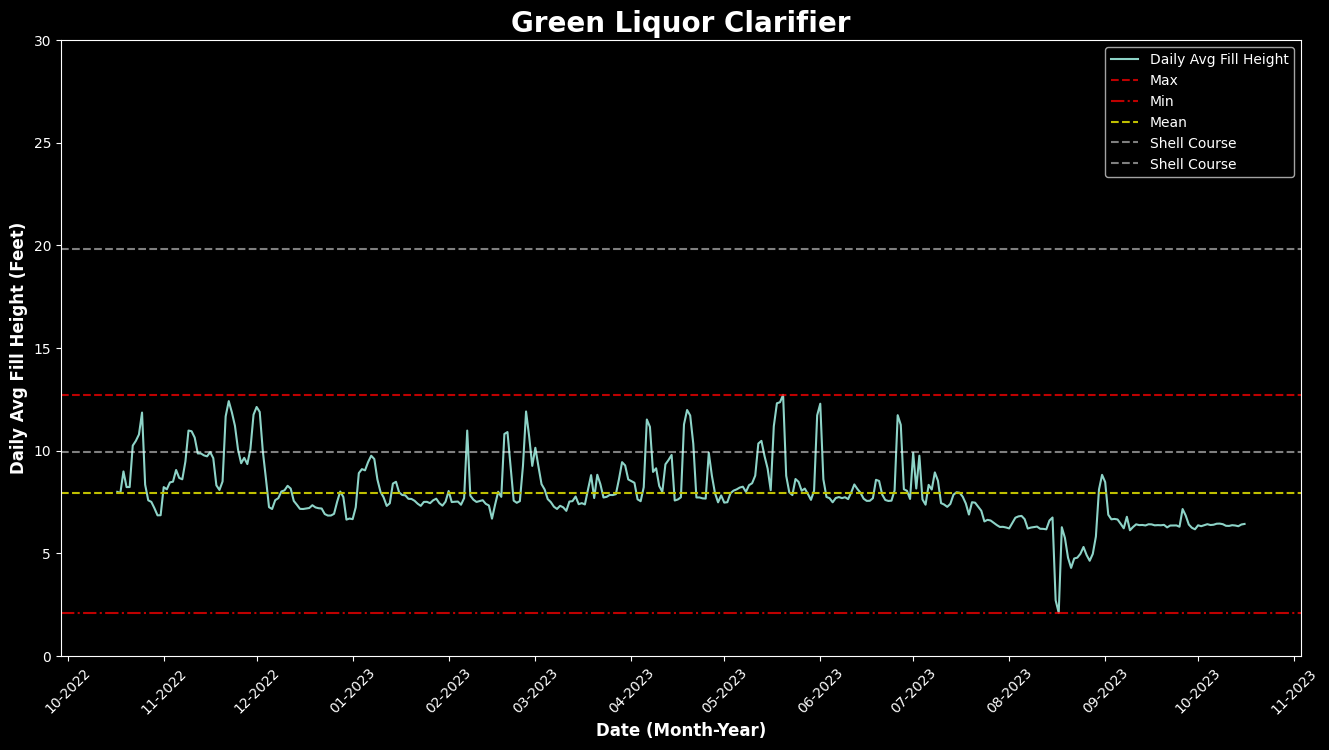

In [83]:
x = wrk_pidata_df['Date']
y = wrk_pidata_df['Green Liquor Clarifier']
shell_course_list = [9.92, 19.83]
title = 'Green Liquor Clarifier'
max_height = 30

plot_fill_height(x, y, max_height, shell_course_list, title)

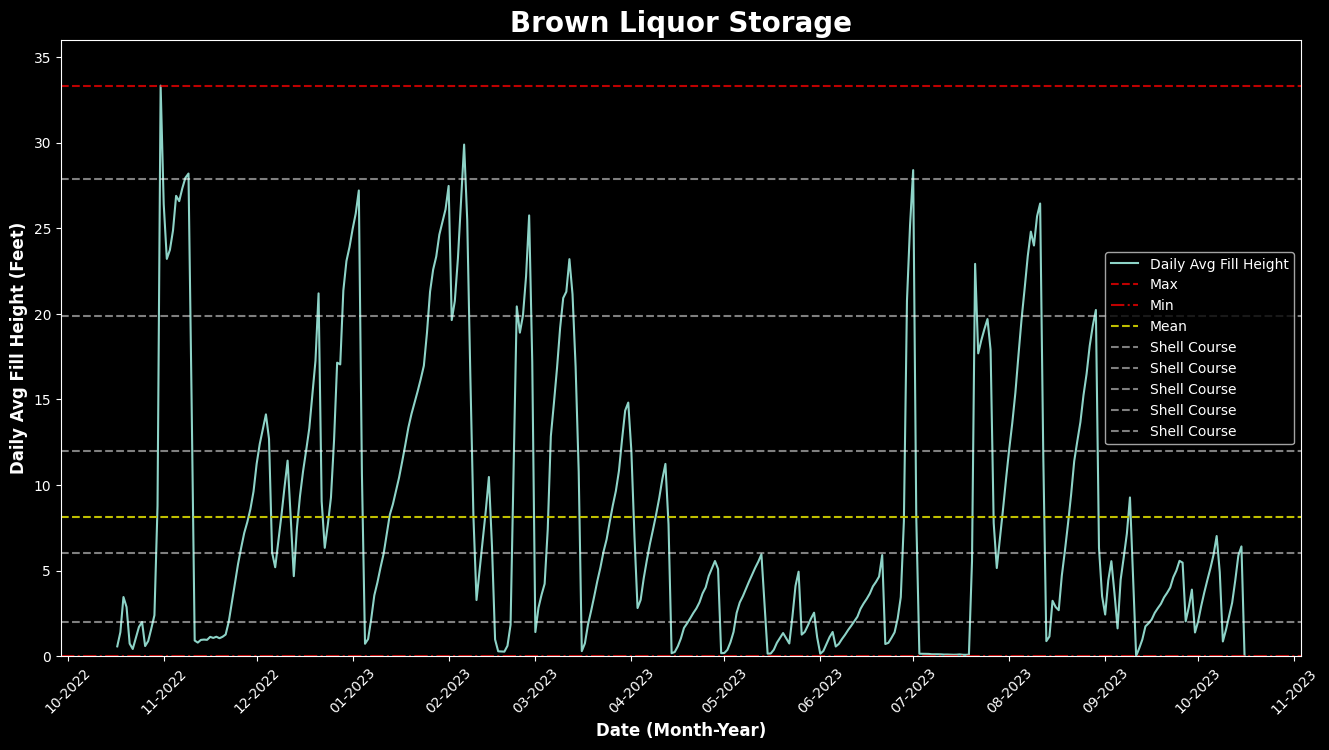

In [84]:
x = wrk_pidata_df['Date']
y = wrk_pidata_df['Brown Liquor Storage']
shell_course_list = [2, 6, 12, 19.9, 27.9]
title = 'Brown Liquor Storage'
max_height = 36

plot_fill_height(x, y, max_height, shell_course_list, title)

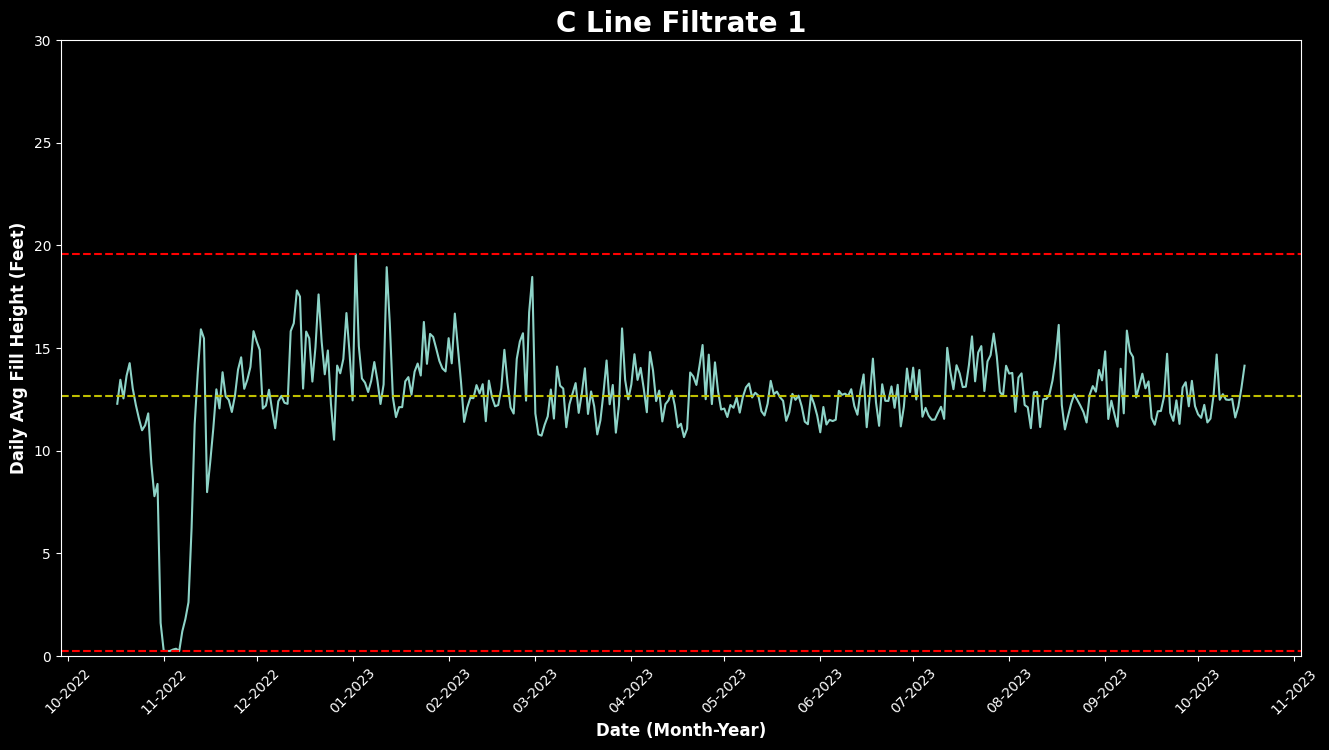

In [61]:
x = wrk_pidata_df['Date']
y = wrk_pidata_df['C Line Filtrate 1']
title = 'C Line Filtrate 1'
max_height = 30

plot_fill_height(x, y, max_height, title)

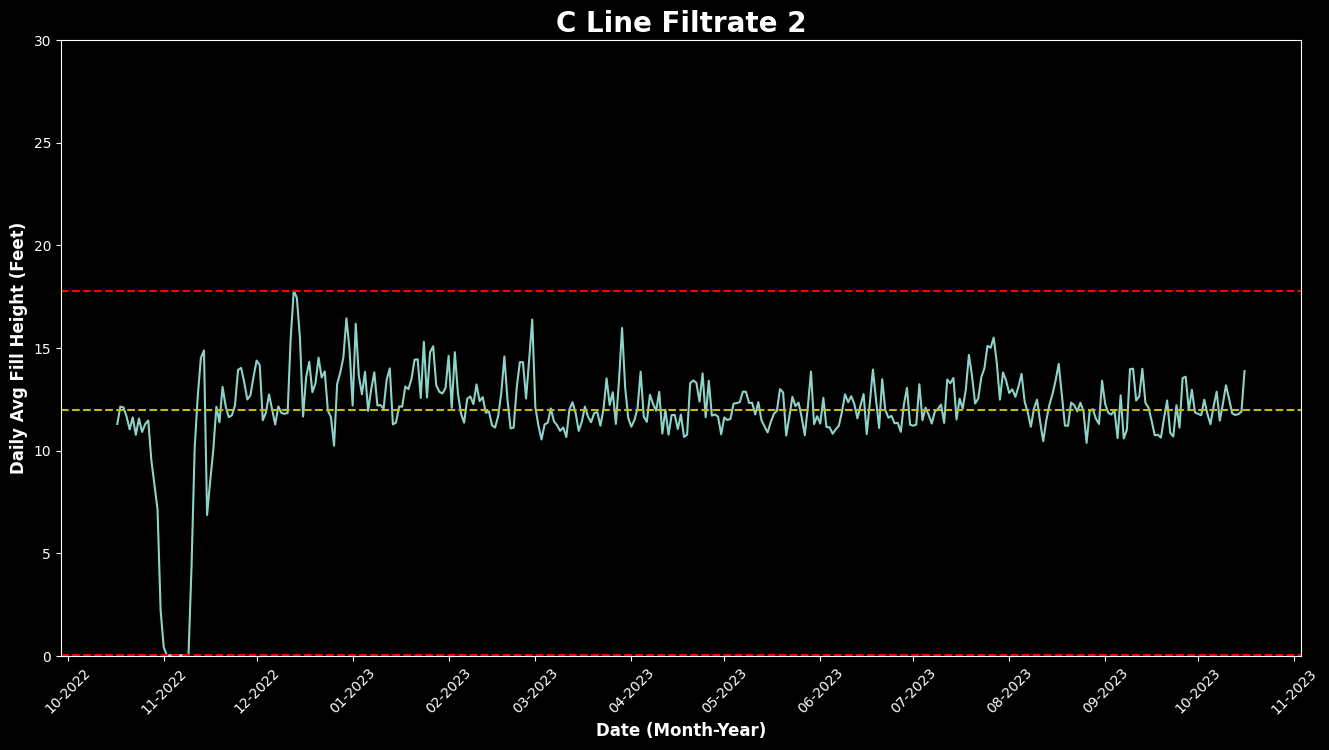

In [62]:
x = wrk_pidata_df['Date']
y = wrk_pidata_df['C Line Filtrate 2']
title = 'C Line Filtrate 2'
max_height = 30

plot_fill_height(x, y, max_height, title)